# Independent Component Analyses (ICA) - Überblick und Anwendungen


* Verfahren aus der Zeitreihenanalyse
* Trennung von überlagerten Signalen 
* Erkennung zugrundeliegender Prozesse


Dipl. Phys. Stephan Porz | Data Scientist bei Adblockplus.org

## Problemstellung

In [1]:
from IPython.display import SVG, display

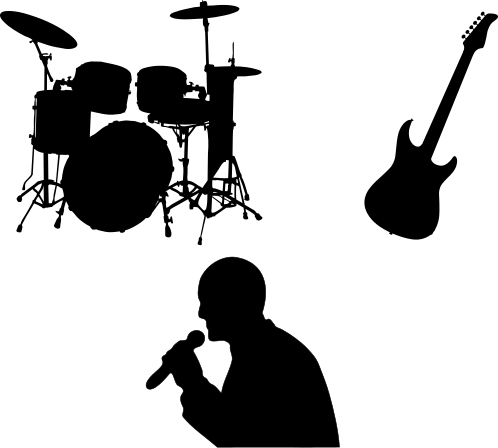

In [2]:
display(SVG(filename='pictures/band.svg'))

## Problemstellung

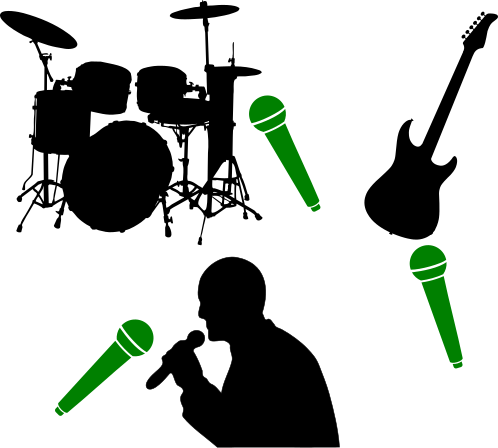

In [3]:
display(SVG(filename='pictures/band_recording.svg'))

## Problemstellung

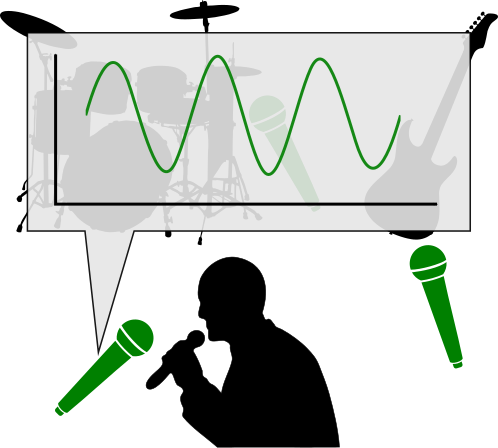

In [4]:
display(SVG(filename='pictures/band_sing.svg'))

## Problemstellung

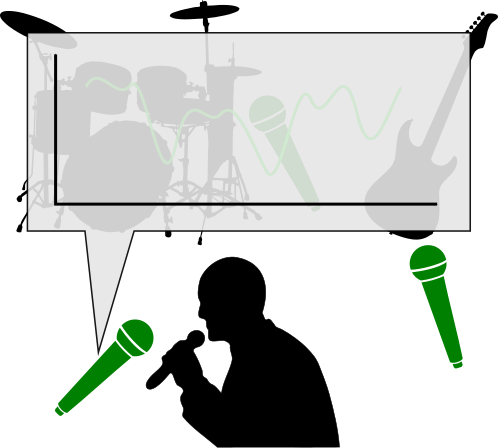

In [5]:
display(SVG(filename='pictures/band_mix.svg'))

## Problemstellung

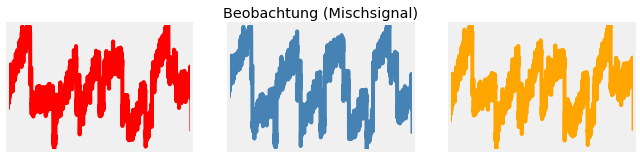

In [95]:
%matplotlib inline

from itertools import product

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations
X /= X.std(axis=0)

models = [X, S]
names = ['Beobachtung (Mischsignal)',
         'Erzeugtes Signal']
histname = "Amplitudenverteilung"
colors = ['red', 'steelblue', 'orange']


plt.figure(figsize=(10,5))
for idx, (mdx, sdx) in enumerate(product(range(1), range(3))):
    ax = plt.subplot(len(models), 3, idx + 1)
    ax.set_yticks([])
    ax.set_xticks([])
    if sdx == 1:
        plt.title(names[mdx])
    plt.plot(models[mdx].T[sdx], color=colors[sdx])

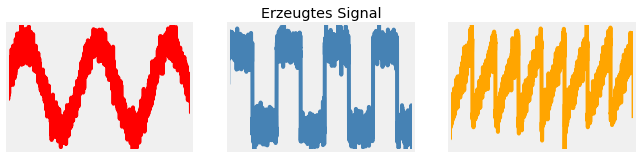

In [96]:
plt.figure(figsize=(10,5))
for idx, (mdx, sdx) in enumerate(product([1], range(3))):
    ax = plt.subplot(len(models), 3, idx + 1)
    ax.set_yticks([])
    ax.set_xticks([])
    if sdx == 1:
        plt.title(names[mdx])
    plt.plot(models[mdx].T[sdx], color=colors[sdx])

## Funktionsweise

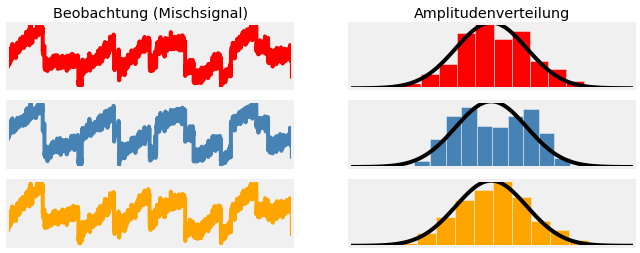

In [97]:
def gaussian(x, mu, sig):
    return 1/(sig * (2 * np.pi)**0.5) * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

plt.figure(figsize=(10,4))
for sdx in range(3):
        
    ax = plt.subplot(3, 2, sdx * 2 + 1)
    if sdx == 0:
        plt.title(names[0])
    ax.set_yticks([])
    ax.set_xticks([])
    plt.plot(models[0].T[sdx], color=colors[sdx])
    
    ax = plt.subplot(3, 2, sdx * 2 + 2)
    if sdx == 0:
        plt.title(histname)
    ax.set_yticks([])
    ax.set_xticks([])
    plt.hist(models[0].T[sdx], color=colors[sdx], normed = True)

    x = np.linspace(-4, 4, 120)
    plt.plot(x, gaussian(x, 0, 1), color="k")


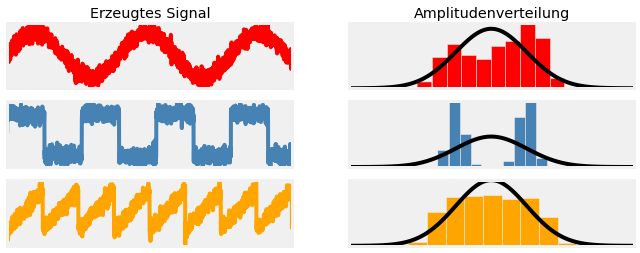

In [98]:
plt.figure(figsize=(10,4))
for sdx in range(3):
    ax = plt.subplot(3, 2, sdx * 2 + 1)
    if sdx == 0:
        plt.title(names[1])
    ax.set_yticks([])
    ax.set_xticks([])
    plt.plot(models[1].T[sdx], color=colors[sdx])
    
    ax = plt.subplot(3, 2, sdx * 2 + 2)
    if sdx == 0:
        plt.title(histname)
    ax.set_yticks([])
    ax.set_xticks([])
    plt.hist(models[1].T[sdx], color=colors[sdx], normed = True)

    x = np.linspace(-4, 4, 120)
    plt.plot(x, gaussian(x, 0, 1), color="k")

## Annahmen

* zugrunde liegende Signale statistisch unabhängig
* bis auf ein Signal nicht-gaußsche Amplitudenverteilung

## Einschränkungen

* Varianz (Signalenergie) nicht bestimmbar
* Vorzeichen nicht bestimmbar

## Bibliotheken

[Python: sklearn.decomposition.FastICA](subtalks/talk_python.slides.html#/)

[R: Paket fastICA](subtalks/talk_R.slides.html#/)

## Andwendungen

### Rekonstruktion von bekannten Signalquellen 
* alle Quellen bekannt 
  * wie im Musik Beispiel
* einige Quellen bekannt
  * z.B. zur Erkennung und Entfernung von Artefakten

### Suche nach zugrundeliegenden Prozessen
* z.B. Gehirn, Börse, Wetter, etc.
* Dimensionsreduktion (maschinelles Lernen)
  *  Sortierung der Komponenten nach Abweichung von Gauß

## Literatur

* [Wikipedia ICA](https://en.wikipedia.org/wiki/Independent_component_analysis), [deutsch](https://de.wikipedia.org/wiki/Unabhängigkeitsanalyse)
* [ICA Introduction](http://andreas.welcomes-you.com/research/phd/index.html)
* [Algorithmus FastICA](http://www.cs.helsinki.fi/u/ahyvarin/papers/)


* [Python sklearn.decomposition.FastICA Beispiel](http://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html)
* [R FastICA Dokumentation](https://cran.r-project.org/web/packages/fastICA/fastICA.pdf)


* [EEGLAB Webseite](http://sccn.ucsd.edu/eeglab/)
* [EEGLAB Dokumentation](http://sccn.ucsd.edu/wiki/EEGLAB)


* [OpenClipart](http://openclipart.org)


Verwandte Themen


* [Wikipedia zentraler Grenzwertsatz](https://en.wikipedia.org/wiki/Central_limit_theorem), [deutsch](https://de.wikipedia.org/wiki/Zentraler_Grenzwertsatz)


* [Python.sklearn.decomposition](http://scikit-learn.org/stable/modules/decomposition.html#decompositions)
* [Wikipedia PCA](https://en.wikipedia.org/wiki/Principal_component_analysis), [deutsch](https://de.wikipedia.org/wiki/Hauptkomponentenanalyse)
* [Wikipedia Factor analysis](https://en.wikipedia.org/wiki/Factor_analysis), [deutsch](https://de.wikipedia.org/wiki/Faktorenanalyse)